In [2]:
import pandas as pd
import os
import pytz
import seaborn as sns
sns.set(style="darkgrid")

In [11]:
os.system('rm 46258.txt')
os.system("wget 'https://www.ndbc.noaa.gov/data/realtime2/46258.txt'")

0

In [51]:
dat = pd.read_csv("46258.txt", delim_whitespace=True, header=0, skiprows=[1])
dat = dat.sort_values(['#YY','MM', 'DD', 'hh', 'mm'], ascending=False)
dat['WTMP'] = (dat['WTMP'] * 9/5) + 32
dat.head()


,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,PTDY,TIDE
0,2018,12,24,18,30,MM,MM,MM,1.4,14,9.1,274,MM,MM,63.86,MM,MM,MM,MM
1,2018,12,24,18,0,MM,MM,MM,1.4,15,9.1,270,MM,MM,63.68,MM,MM,MM,MM
2,2018,12,24,17,30,MM,MM,MM,1.2,15,8.5,274,MM,MM,63.68,MM,MM,MM,MM
3,2018,12,24,17,0,MM,MM,MM,1.3,15,8.7,270,MM,MM,63.68,MM,MM,MM,MM
4,2018,12,24,16,30,MM,MM,MM,1.3,15,9.2,274,MM,MM,63.68,MM,MM,MM,MM


In [52]:
dat['date'] = dat['#YY'].astype(str) + '-' + dat['MM'].astype(str) + '-' + dat['DD'].astype(str) + ' ' + dat['hh'].astype(str) + ':' + dat['mm'].astype(str) + ' ' + "GMT"

In [53]:
dat.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,PTDY,TIDE,date
0,2018,12,24,18,30,MM,MM,MM,1.4,14,9.1,274,MM,MM,63.86,MM,MM,MM,MM,2018-12-24 18:30 GMT
1,2018,12,24,18,0,MM,MM,MM,1.4,15,9.1,270,MM,MM,63.68,MM,MM,MM,MM,2018-12-24 18:0 GMT
2,2018,12,24,17,30,MM,MM,MM,1.2,15,8.5,274,MM,MM,63.68,MM,MM,MM,MM,2018-12-24 17:30 GMT
3,2018,12,24,17,0,MM,MM,MM,1.3,15,8.7,270,MM,MM,63.68,MM,MM,MM,MM,2018-12-24 17:0 GMT
4,2018,12,24,16,30,MM,MM,MM,1.3,15,9.2,274,MM,MM,63.68,MM,MM,MM,MM,2018-12-24 16:30 GMT


In [54]:
dat['date'] = pd.to_datetime(dat['date'], errors='coerce')
dat['date'] = dat['date'].dt.tz_localize('GMT').dt.tz_convert('US/Pacific')

In [55]:
dat['#YY'] = dat.date.dt.year
dat['MM'] = dat.date.dt.month
dat['DD'] = dat.date.dt.day
dat['hh'] = dat.date.dt.hour
dat['mm'] = dat.date.dt.minute
dat = dat.sort_values('date', ascending=False)

In [56]:
dat.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,PTDY,TIDE,date
0,2018,12,24,10,30,MM,MM,MM,1.4,14,9.1,274,MM,MM,63.86,MM,MM,MM,MM,2018-12-24 10:30:00-08:00
1,2018,12,24,10,0,MM,MM,MM,1.4,15,9.1,270,MM,MM,63.68,MM,MM,MM,MM,2018-12-24 10:00:00-08:00
2,2018,12,24,9,30,MM,MM,MM,1.2,15,8.5,274,MM,MM,63.68,MM,MM,MM,MM,2018-12-24 09:30:00-08:00
3,2018,12,24,9,0,MM,MM,MM,1.3,15,8.7,270,MM,MM,63.68,MM,MM,MM,MM,2018-12-24 09:00:00-08:00
4,2018,12,24,8,30,MM,MM,MM,1.3,15,9.2,274,MM,MM,63.68,MM,MM,MM,MM,2018-12-24 08:30:00-08:00


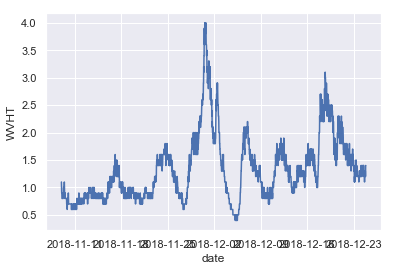

In [58]:
sns.lineplot(x="date", y="WVHT", data=dat)


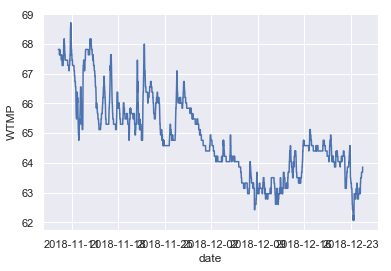

In [59]:
sns.lineplot(x='date', y='WTMP', data = dat)